In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
dataset = pd.read_excel("Employees.xlsx")
dataset.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [6]:
dataset.shape

(689, 15)

In [7]:
dataset.isnull().sum()

No                0
First Name        0
Last Name         0
Gender            0
Start Date        0
Years             0
Department        0
Country           0
Center            0
Monthly Salary    0
Annual Salary     0
Job Rate          0
Sick Leaves       0
Unpaid Leaves     0
Overtime Hours    0
dtype: int64

In [9]:
dataset.duplicated().sum()

np.int64(0)

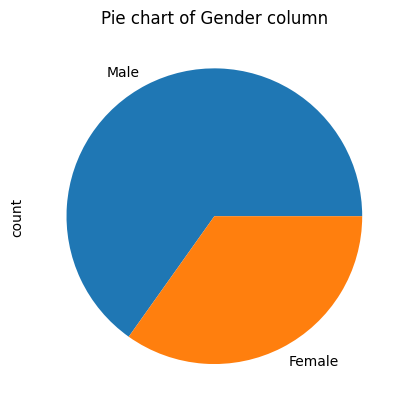

In [13]:
dataset["Gender"].value_counts().plot(kind="pie")
plt.title("Pie chart of Gender column")
plt.show()

In [14]:
dataset.head(2)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198


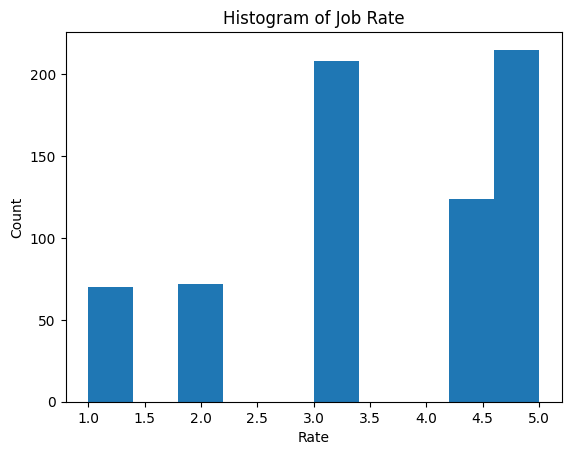

In [16]:
plt.hist(dataset["Job Rate"])
plt.title("Histogram of Job Rate")
plt.xlabel("Rate")
plt.ylabel("Count")
plt.show()

In [18]:
dataset.head(2)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198


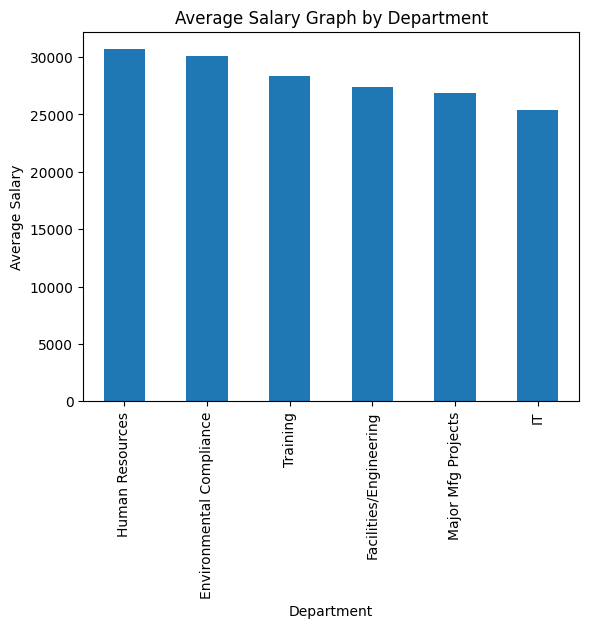

In [25]:
dataset.groupby("Department")["Annual Salary"].mean().sort_values(ascending=False).head(6).plot(kind="bar")
plt.title("Average Salary Graph by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

In [28]:
dataset.groupby("Center")["Monthly Salary"].mean().sort_values(ascending=True)

Center
South    1981.153846
Main     2054.776892
North    2064.811594
West     2068.672269
East     2274.021277
Name: Monthly Salary, dtype: float64

In [29]:
dataset["Country"].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

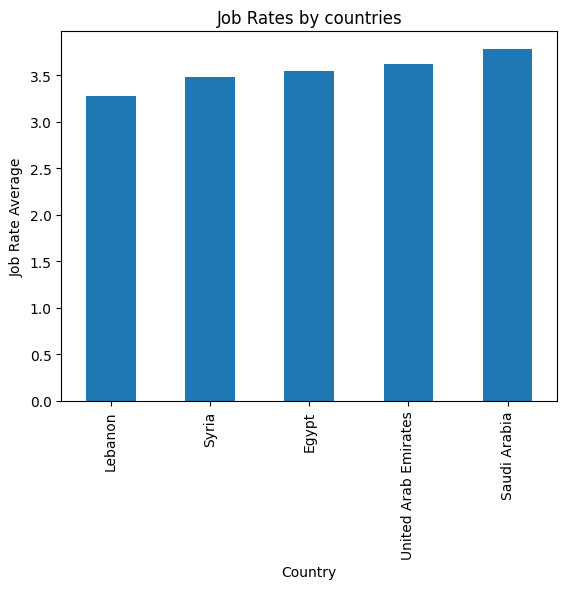

In [34]:
dataset.groupby("Country")["Job Rate"].mean().sort_values(ascending=True).plot(kind="bar")
plt.title("Job Rates by countries")
plt.xlabel("Country")
plt.ylabel("Job Rate Average")
plt.show()

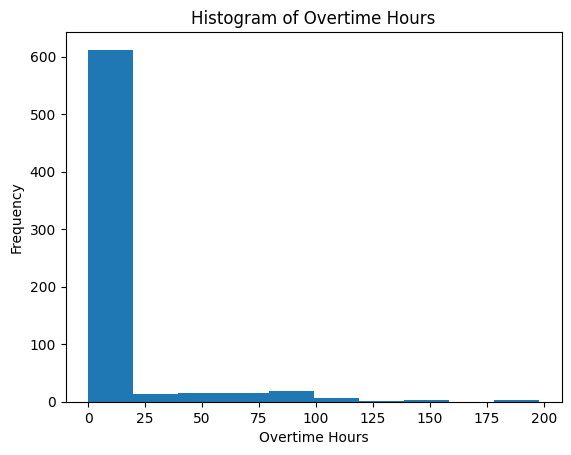

In [35]:
plt.hist(dataset["Overtime Hours"])
plt.title("Histogram of Overtime Hours")
plt.xlabel("Overtime Hours")
plt.ylabel("Frequency")
plt.show()

In [36]:
dataset.columns

Index(['No', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

In [37]:
x = dataset[["Years","Job Rate"]]
y = dataset["Annual Salary"]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Training and Testing Split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [41]:
x.shape, x_train.shape, x_test.shape

((689, 2), (551, 2), (138, 2))

In [43]:
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
preds_lr = lr.predict(x_test)

In [46]:
mean_absolute_error(preds_lr,y_test)

8458.103617881041

In [47]:
import joblib
joblib.dump(lr,"Linear_model.pkl")

['Linear_model.pkl']